<p align="middle"><font size="6">    Home Credit Default Risk </font></p> 

# 1.Business/Real-world Problem

## 1.1 Problem Statement
<p>Build a model which can predict how capable each applicant is of repaying a loan. </p>

## 1.2 Source/Useful Links
https://www.kaggle.com/c/home-credit-default-risk/team

## 1.3 Real-world/Business objectives and constraints.
- No strict latency constraints.
- Interpretability is important.
- Mis-Classification cost is very high.

# 2. Machine Learning Problem


 


## 2.1 Data Description


### application_{train|test}.csv
 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.

### bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


### bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows. 

### POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


### credit_card_balance.csv 
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
 
### previous_application.csv
  - All previous applications for Home Credit loans of clients who have loans in our sample.
  - There is one row for each previous application related to loans in our data sample.
 
### installments_payments.csv
 - Repayment history for the previously disturbed credits in Home Credit related to the loans in our sample.
 - There is a) one row for every payment that was made plus b) one row each for missed payment.
 - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

### HomeCredit_columns_description.csv
- This file contains descriptions for the columns in the various data files.


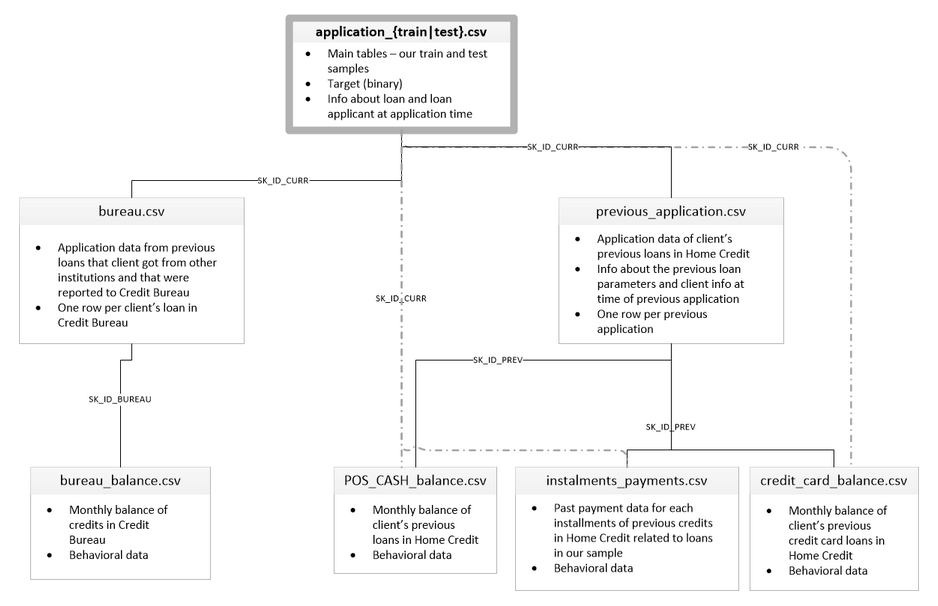

In [0]:
from IPython.display import Image
Image(filename='flow.png')

## 2.2 Type of Machine Learning Problem
<p>It is a binary class classification problem where 0 means person is capable of repaying a loan and 1 means person is not capable of repaying a loan. </p>

## 2.3 Performance Metric
- AUC
- Confusion matrix

## 3. Download the dataset

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580916655&Signature=N8bGIc9z3FSFcDpTb9x%2FET5xG5B%2FOdlkxUKQ6hWVwr%2FVyoxki6x%2BBtVlyvckcPiP5nLDP5KvqrmlxBkKcIVkYK8JQTe%2BGY6fL2YMQlVht5Fld1wO6cnJikB8Yp2vyuC2RZYt5QSXva6MID%2BpvWI8njIYHMMTpffTXVE8W5ubeaRlt3fUYb2ar8nHUkAfK4fwCjacF14HvGcDYCwKskN3o9YWItM80mY2%2BG1UiQKvDFWsST4lM6hsEKd87xHo09O0OK0WDjFIwGCfpw%2BYgbG0SDn8uZb%2FF4vMKdBZK4vMbpLIEl05Ds1T2%2FOd2I4mkICjVa8ZqFpYIv6jAOtLmdAkFQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip" -O "home-credit-default-risk.zip" -c

--2020-02-03 05:19:17--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580916655&Signature=N8bGIc9z3FSFcDpTb9x%2FET5xG5B%2FOdlkxUKQ6hWVwr%2FVyoxki6x%2BBtVlyvckcPiP5nLDP5KvqrmlxBkKcIVkYK8JQTe%2BGY6fL2YMQlVht5Fld1wO6cnJikB8Yp2vyuC2RZYt5QSXva6MID%2BpvWI8njIYHMMTpffTXVE8W5ubeaRlt3fUYb2ar8nHUkAfK4fwCjacF14HvGcDYCwKskN3o9YWItM80mY2%2BG1UiQKvDFWsST4lM6hsEKd87xHo09O0OK0WDjFIwGCfpw%2BYgbG0SDn8uZb%2FF4vMKdBZK4vMbpLIEl05Ds1T2%2FOd2I4mkICjVa8ZqFpYIv6jAOtLmdAkFQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-c

In [2]:
!unzip /content/home-credit-default-risk.zip

Archive:  /content/home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


## 4. Include packages

In [0]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import math
from math import log
%matplotlib inline
import gc
import pickle
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## 5. Perform EDA

In [0]:
Df_application_train=pd.read_csv("application_train.csv")

In [0]:
Df_application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [0]:
Df_application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

The dataset is highly imbalanced. There are more number of person in the dataset who are capable of giving the loan.

In [0]:
Df_application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [0]:
Df_application_train.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [0]:
Df_application_test=pd.read_csv("application_test.csv")

In [0]:
Df_application_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### Function to plot bar graph

In [0]:
def stack_plot(data, xtick, col2, col3='total'):
    ind = np.arange(data.shape[0])
    %matplotlib inline
    plt.figure(figsize=(10,3))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    plt.ylabel('No of Loans')
    plt.title('Number of peoples capable vs not capable of giving loans'
    plt.xticks(ind, list(data[xtick].values),rotation=-90)
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()
def univariate_barplots(data, col1, col2, top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(Df_application_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    
    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(Df_application_train.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    
    temp['Avg'] = pd.DataFrame(Df_application_train.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
  
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    

### 6. Analysis on application.csv file

#### 6.1 Identification if loan is cash or revolving

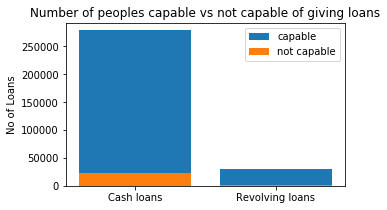

In [0]:
univariate_barplots(Df_application_train, 'NAME_CONTRACT_TYPE', 'TARGET' , top=False)

observation:Many people took cash loans. 

### 6.2 Gender of the client

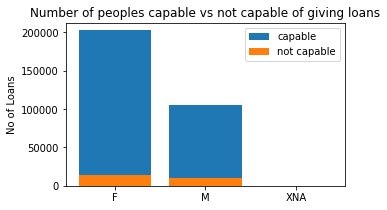

In [0]:
univariate_barplots(Df_application_train, 'CODE_GENDER', 'TARGET' , top=False)

observation : Female took more no of loans then males.

### 6.3 Flag if the client owns a car

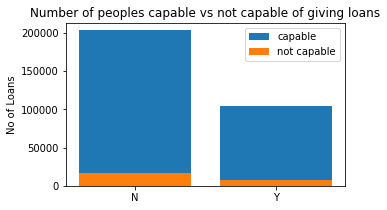

In [0]:
univariate_barplots(Df_application_train, 'FLAG_OWN_CAR', 'TARGET' , top=False)

observation : People who own a car took less no of loan.

### 6.4 Flag if client owns a house or flat

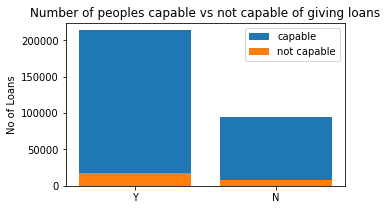

In [0]:
univariate_barplots(Df_application_train, 'FLAG_OWN_REALTY', 'TARGET' , top=False)

observation : People who owns a house or flat takes more no of loans.

### 6.5 Number of children the client has

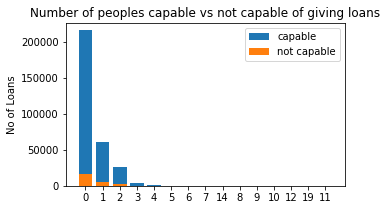

In [0]:
univariate_barplots(Df_application_train, 'CNT_CHILDREN', 'TARGET' , top=False)

observation : Clients having no child take more no of loans and are also more defaulters.

### Function to plot pie chart

In [0]:
def labelupdate(autotexts,labels):
  l=[]
  for i in range(len(labels)):
    l.append(str(autotexts[i]._text) + ' ' + str(labels[i]))
  return(l)

def plotpiechart(s):
  %matplotlib inline
  import random
  labels=list(Df_application_train[s].unique())
  labels=[x for x in labels if (str(x)!='nan')]
  fracs1=[]
  fracs2=[]
  fracs3=[]
  for x in labels:
    count1 = sum(Df_application_train[s]==x)
    fracs1.append(count1)
    count2 = sum(Df_application_train[Df_application_train['TARGET']==0][s]==x)
    fracs2.append(count2)
    count3 = sum(Df_application_train[Df_application_train['TARGET']==1][s]==x)
    fracs3.append(count3)
  colors=["#9c9ede", "#7375b5", "#4a5584", "#cedb9c", "#b5cf6b", "#8ca252", "#637939",
        "#e7cb94", "#e7ba52", "#bd9e39", "#8c6d31", "#e7969c", "#d6616b", "#ad494a",
        "#843c39", "#de9ed6", "#ce6dbd", "#a55194", "#7b4173","#1f77b4", "#aec7e8",
        "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728", "#ff9896", "#9467bd",
        "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", "#c7c7c7",
        "#bcbd22", "#dbdb8d", "#17becf", "#9edae5","#1f77b4", "#ff7f0e", "#2ca02c", 
        "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
  colors=random.sample(colors, len(labels))
  plt.title("Total distribution ")
  
  patches,texts,autotexts=plt.pie(fracs1, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius=1,textprops={'size': 'smaller'})
  l=labelupdate(autotexts,labels) 
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure) 
  plt.show()
  plt.title("Loan payable ")
  patches,texts,autotexts=plt.pie(fracs2, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius=1,textprops={'size': 'smaller'})
  l=labelupdate(autotexts,labels) 
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure) 
  plt.show()
  plt.title("Loan not payable ")
  patches,texts,autotexts=plt.pie(fracs3, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,textprops={'size': 'smaller'},radius=1)
  l=labelupdate(autotexts,labels) 
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure)
  plt.show()
  


### 6.6 Who was accompanying client when he was applying for the loan

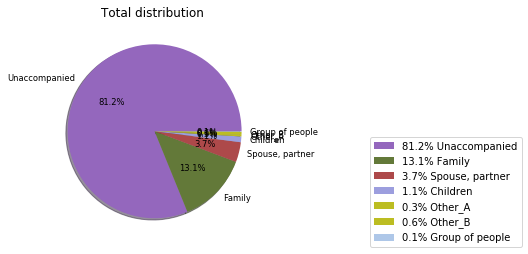

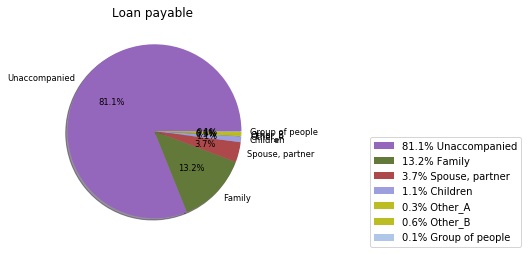

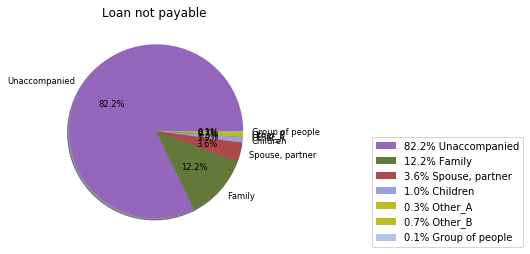

In [0]:
plotpiechart('NAME_TYPE_SUITE')

observation : Client who came alone took more loan but also were more defaulters.

### 6.7 Clients income type (Working,State servant,Commercial associate,Pensioner,Unemployed,Student,Businessman,Maternity leave)

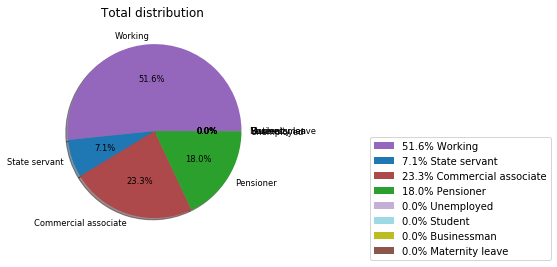

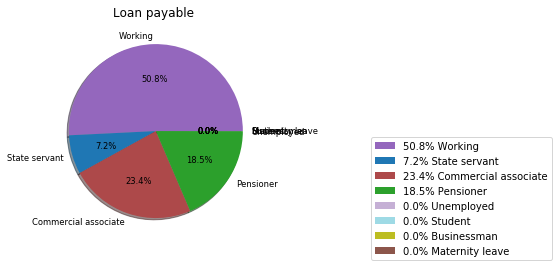

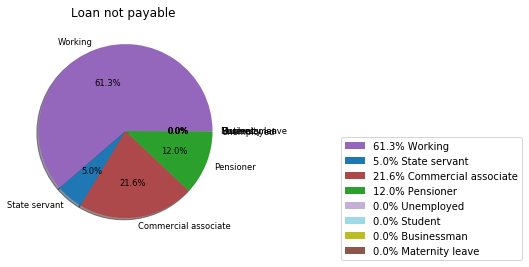

In [0]:
plotpiechart('NAME_INCOME_TYPE')

observation : clients with income type working take more no of loans.

### 6.8 Level of highest education the client achieved.

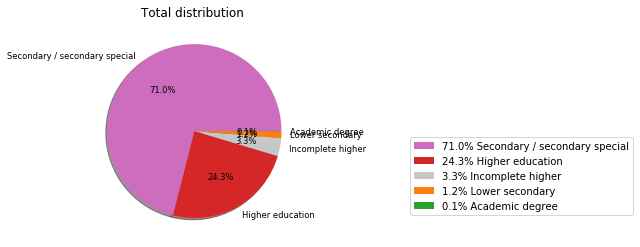

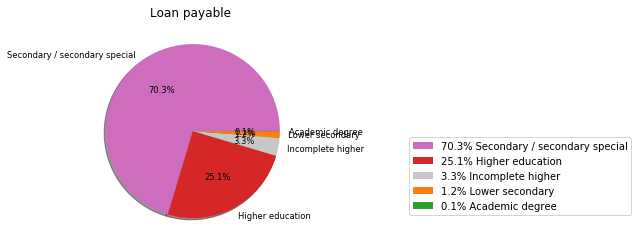

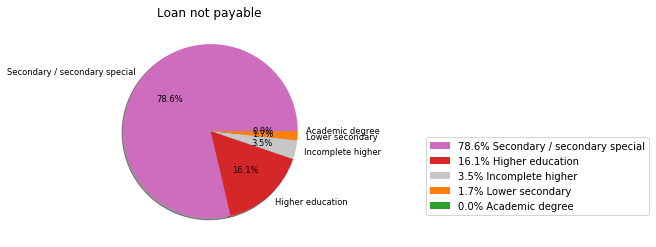

In [0]:
plotpiechart('NAME_EDUCATION_TYPE')

observation : people with highest degree as secondary and secondary special are more no of defaulters compare to people with other degree. 

### 6.9 For consumer loans it is the price of the goods for which the loan is given

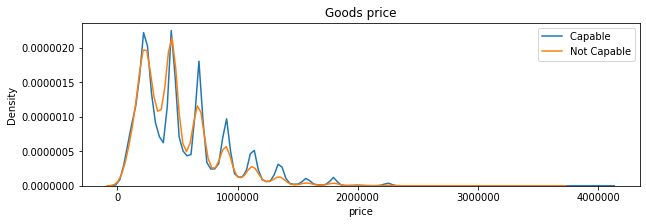

In [0]:
from math import log

count1 = Df_application_train[Df_application_train['TARGET']==0]['AMT_GOODS_PRICE']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan')]
count2 = Df_application_train[Df_application_train['TARGET']==1]['AMT_GOODS_PRICE']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan')]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('Goods price')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend()
plt.show()

Observation: Most no of loans are given for goods price below 10 lakhs

### 6.10 Loan annuity

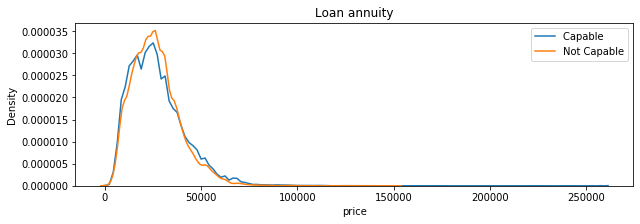

In [5]:
from math import log

count1 = Df_application_train[Df_application_train['TARGET']==0]['AMT_ANNUITY']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan')]
count2 = Df_application_train[Df_application_train['TARGET']==1]['AMT_ANNUITY']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan')]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('Loan annuity')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend()
plt.show()


observation : Most people pay annuity below 50000 for the credit loan 

### 6.11 : Income of the client

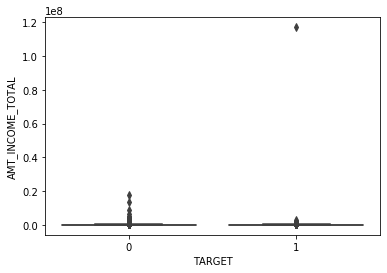

In [0]:
sns.boxplot(x='TARGET',y='AMT_INCOME_TOTAL', data=Df_application_train)
plt.show()

We can't say anything here let's check the percentile 

In [0]:
v=Df_application_train['AMT_INCOME_TOTAL'].values
v=np.sort(v)
for i in range(0,100,10):
  print(i,'percentile value is',v[int(len(v)*float(i)/100)])
print(100,'percentile value is',v[-1])

0 percentile value is 25650.0
10 percentile value is 81000.0
20 percentile value is 99000.0
30 percentile value is 112500.0
40 percentile value is 135000.0
50 percentile value is 147150.0
60 percentile value is 162000.0
70 percentile value is 180000.0
80 percentile value is 225000.0
90 percentile value is 270000.0
100 percentile value is 117000000.0


In [0]:
v=Df_application_train['AMT_INCOME_TOTAL'].values
v=np.sort(v)
for i in range(90,100,1):
  print(i,'percentile value is',v[int(len(v)*float(i)/100)])
print(100,'percentile value is',v[-1])

90 percentile value is 270000.0
91 percentile value is 270000.0
92 percentile value is 292500.0
93 percentile value is 315000.0
94 percentile value is 315000.0
95 percentile value is 337500.0
96 percentile value is 360000.0
97 percentile value is 382500.0
98 percentile value is 427500.0
99 percentile value is 472500.0
100 percentile value is 117000000.0


In [0]:
v=Df_application_train['AMT_INCOME_TOTAL'].values
v=np.sort(v)
for i in np.arange(0.0,1.0,0.1):
  print(99+i,'percentile value is',v[int(len(v)*float(99+i)/100)])
print(100,'percentile value is',v[-1])

99.0 percentile value is 472500.0
99.1 percentile value is 495000.0
99.2 percentile value is 540000.0
99.3 percentile value is 540000.0
99.4 percentile value is 562500.0
99.5 percentile value is 630000.0
99.6 percentile value is 675000.0
99.7 percentile value is 675000.0
99.8 percentile value is 765000.0
99.9 percentile value is 900000.0
100 percentile value is 117000000.0


In [0]:
v=Df_application_train['AMT_INCOME_TOTAL'].values
v=np.sort(v)
for i in np.arange(0.90,1.0,0.01):
  print(99+i,'percentile value is',v[int(len(v)*float(99+i)/100)])
print(100,'percentile value is',v[-1])

99.9 percentile value is 900000.0
99.91 percentile value is 909000.0
99.92 percentile value is 1035000.0
99.93 percentile value is 1125000.0
99.94 percentile value is 1125000.0
99.95 percentile value is 1215000.0
99.96 percentile value is 1350000.0
99.97 percentile value is 1350000.0
99.98 percentile value is 1800000.0
99.99 percentile value is 2250000.0
100 percentile value is 117000000.0


In [0]:
v=Df_application_train['AMT_INCOME_TOTAL'].values
v=np.sort(v)
for i in np.arange(0.99,0.999,0.001):
  print(99+i,'percentile value is',v[int(len(v)*float(99+i)/100)])
print(100,'percentile value is',v[-1])

99.99 percentile value is 2250000.0
99.991 percentile value is 2250000.0
99.992 percentile value is 2250000.0
99.993 percentile value is 2250000.0
99.994 percentile value is 2700000.0
99.995 percentile value is 3150000.0
99.996 percentile value is 3600000.0
99.997 percentile value is 3950059.5
99.998 percentile value is 4500000.0
99.999 percentile value is 9000000.0
100 percentile value is 117000000.0


In [0]:
Df_application_train[Df_application_train['AMT_INCOME_TOTAL']>9000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,...,NaN,0.0626,NaN,NaN,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,10.0,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 6.12 Credit amount of the loan

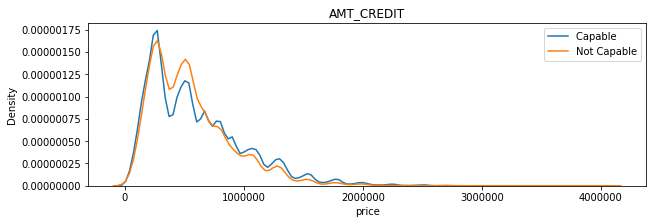

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['AMT_CREDIT']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan')]
count2 = Df_application_train[Df_application_train['TARGET']==1]['AMT_CREDIT']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan')]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('AMT_CREDIT')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend()
plt.show()


observation : Credit amount of the loan is mostly less then 10 lakhs 

### 6.13 How many days before the application did client change his registration

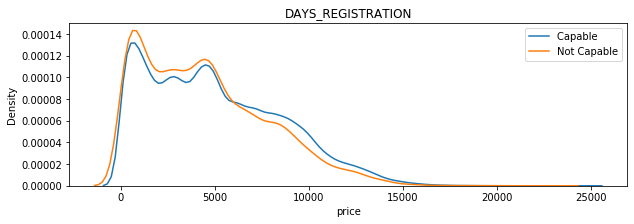

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['DAYS_REGISTRATION']
count1 = count1.values
count1=[-x for x in count1 if (str(x)!='nan' and x!=0)]
count2 = Df_application_train[Df_application_train['TARGET']==1]['DAYS_REGISTRATION']
count2 = count2.values
count2=[-x for x in count2 if (str(x)!='nan' and x!=0)]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('DAYS_REGISTRATION')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend()
plt.show()

Observation: Most of the applicant changed their registration 15000 days before the application.

### 6.14 Age of client's car

In [0]:
Df_application_train['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

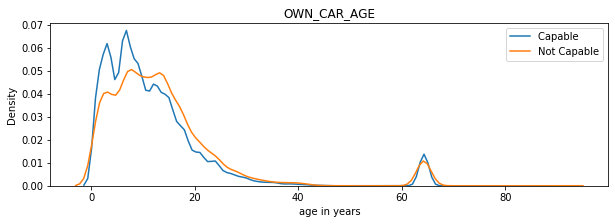

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['OWN_CAR_AGE']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan' and x!=0)]
count2 = Df_application_train[Df_application_train['TARGET']==1]['OWN_CAR_AGE']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan' and x!=0)]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('OWN_CAR_AGE')
plt.legend()
plt.xlabel('age in years')
plt.ylabel('Density')
plt.show()

observation : Most of the cars are in age group between 0-20 and less between 40-60.

### 6.15 Did client provide mobile phone (1=YES, 0=NO)

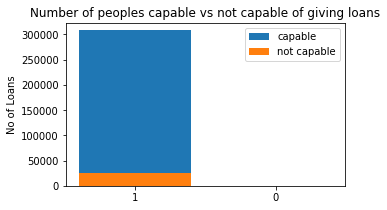

In [0]:
univariate_barplots(Df_application_train, 'FLAG_MOBIL', 'TARGET' , top=False)


observation: nearly all applicants have provided their mobile information. Lets check how many applicants are there who have not provided the mobile information.

In [0]:
c=Df_application_train.FLAG_MOBIL.values
co=0
for i in c:
  if(i!=1):
    co=co+1
co

1

In [0]:
Df_application_train[Df_application_train['FLAG_MOBIL']==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,21.0,0,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,...,NaN,0.1306,NaN,NaN,NaN,block of flats,0.1067,Panel,No,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


There is only 1 client who did not provide the mobile information.

### 6.16 Did client provide work phone (1=YES, 0=NO)

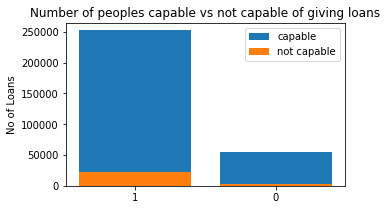

In [0]:
univariate_barplots(Df_application_train, 'FLAG_EMP_PHONE', 'TARGET' , top=False)

observation : More no of applicants provide work phone.

### 6.17 What kind of occupation does the client have

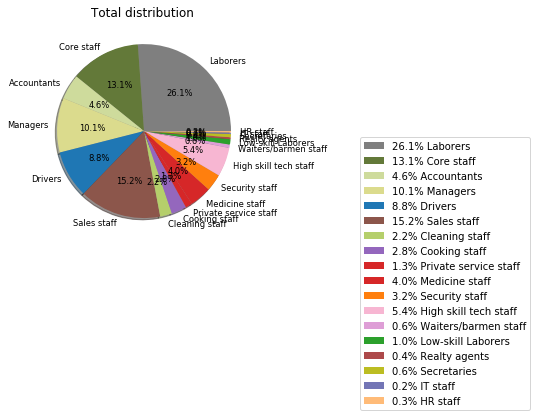

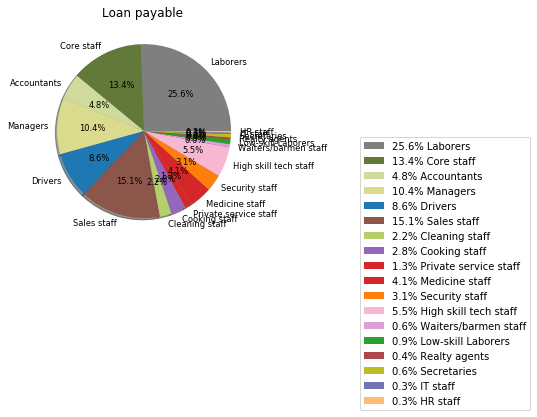

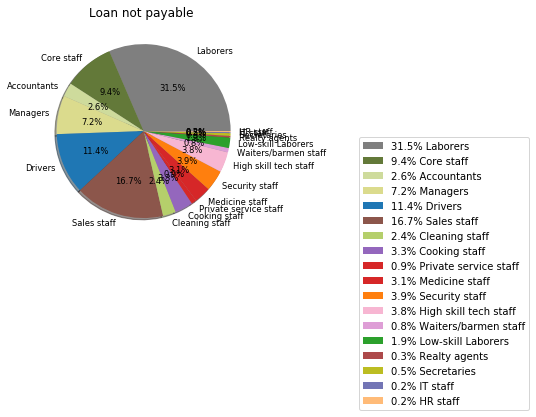

In [0]:
plotpiechart('OCCUPATION_TYPE')

observation : Laborers take more no of loans but also are more no of defaulters.

### 6.18 Type of organization where client works

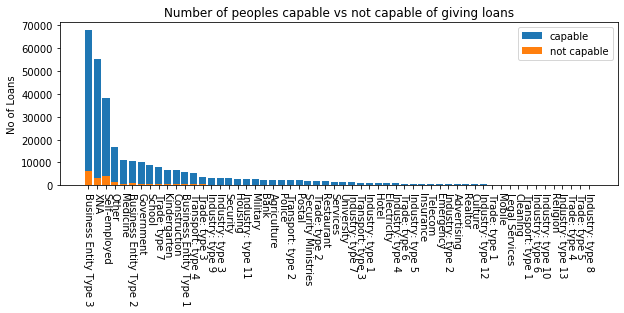

In [0]:
univariate_barplots(Df_application_train, 'ORGANIZATION_TYPE', 'TARGET' , top=False)

observation : clients working in business and self employed are more no of defaulters but they also take more no of loan.

### 6.19 Normalized score from external data source

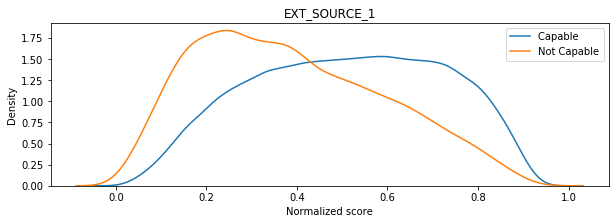

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['EXT_SOURCE_1']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan' and x!=0)]
count2 = Df_application_train[Df_application_train['TARGET']==1]['EXT_SOURCE_1']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan' and x!=0)]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('EXT_SOURCE_1')
plt.xlabel('Normalized score')
plt.ylabel('Density')
plt.legend()
plt.show()

observation : data is well seperated it will be a important feature.


### 6.20 Normalized score from external data source

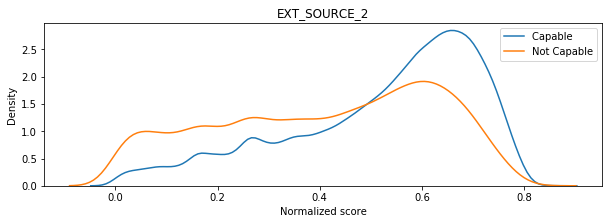

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['EXT_SOURCE_2']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan' and x!=0)]
count2 = Df_application_train[Df_application_train['TARGET']==1]['EXT_SOURCE_2']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan' and x!=0)]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('EXT_SOURCE_2')
plt.xlabel('Normalized score')
plt.ylabel('Density')
plt.legend()
plt.show()

observation : data is well seperated it will be a important feature

### 6.21 Normalized score from external data source

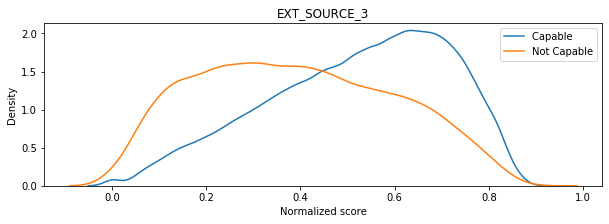

In [0]:
from math import log
count1 = Df_application_train[Df_application_train['TARGET']==0]['EXT_SOURCE_3']
count1 = count1.values
count1=[x for x in count1 if (str(x)!='nan' and x!=0)]
count2 = Df_application_train[Df_application_train['TARGET']==1]['EXT_SOURCE_3']
count2 = count2.values
count2=[x for x in count2 if (str(x)!='nan' and x!=0)]
plt.figure(figsize=(10,3))
sns.distplot(count1, hist=False, label="Capable ")
sns.distplot(count2, hist=False, label="Not Capable")
plt.title('EXT_SOURCE_3')
plt.xlabel('Normalized score')
plt.ylabel('Density')
plt.legend()
plt.show()

observation : data is well seperated it will be a important feature

**Below code will reduce the memory used by the data frame**

In [18]:
np.iinfo(np.int8).max

127

In [0]:
# code takenn from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


**Feature engineering for application .csv**


**Remove outliers**

In [0]:
(Df_application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

The data looks reasonable there is no outliers in DAYS_BIRTH.

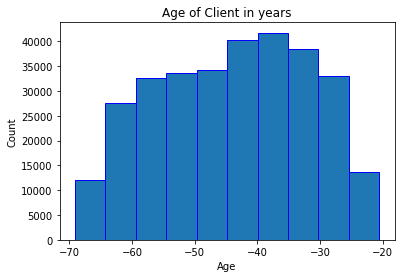

In [0]:
plt.hist(Df_application_train['DAYS_BIRTH'] / 365, edgecolor = 'b', bins = 10)
plt.title('Age of Client in years'); plt.xlabel('Age'); plt.ylabel('Count');

**People of age group between 35-40 years takes maximum no of loans.**

In [0]:
(Df_application_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [0]:
(Df_application_train['DAYS_EMPLOYED']).max()/365

1000.6657534246575

365243 is max value for DAYS_EMPLOYED and after dividing it by 365 it gives 1000.66 which is an outlier because how can a employ works for 1000 years.

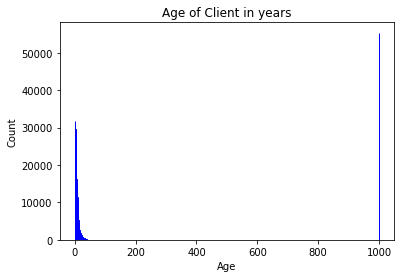

In [0]:
plt.hist(abs(Df_application_train['DAYS_EMPLOYED']) / 365, edgecolor = 'b', bins = 1000)
plt.title('Age of Client in years'); plt.xlabel('Age'); plt.ylabel('Count');

The person with age 1000 is an outlier

In [0]:
Df_application_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

XNA is not a gender we should remove it

In [0]:
Df_application_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

Income type can never be Maternity leave so this should be removed.

In [0]:
d = [data for data in Df_application_train.columns if 'FLAG_DOC' in data]

Df_application_train[d]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking no of 1's in all the flag documents.

In [0]:
for i in d:
  a=sum(Df_application_train[i]==1)
  print(i, "contain no of 1's = ",(a*100/307511)," no of 0's =",(307511-a)*100/307511)

FLAG_DOCUMENT_2 contain no of 1's =  0.004227491049100683  no of 0's = 99.99577250895089
FLAG_DOCUMENT_3 contain no of 1's =  71.00233812774177  no of 0's = 28.997661872258227
FLAG_DOCUMENT_4 contain no of 1's =  0.008129790479039774  no of 0's = 99.99187020952095
FLAG_DOCUMENT_5 contain no of 1's =  1.5114906458630748  no of 0's = 98.48850935413692
FLAG_DOCUMENT_6 contain no of 1's =  8.80553866365756  no of 0's = 91.19446133634244
FLAG_DOCUMENT_7 contain no of 1's =  0.019186305530533868  no of 0's = 99.98081369446946
FLAG_DOCUMENT_8 contain no of 1's =  8.137595077899652  no of 0's = 91.86240492210035
FLAG_DOCUMENT_9 contain no of 1's =  0.389579559755586  no of 0's = 99.61042044024441
FLAG_DOCUMENT_10 contain no of 1's =  0.0022763413341311367  no of 0's = 99.99772365866586
FLAG_DOCUMENT_11 contain no of 1's =  0.39120551785139396  no of 0's = 99.60879448214861
FLAG_DOCUMENT_12 contain no of 1's =  0.000650383238323182  no of 0's = 99.99934961676168
FLAG_DOCUMENT_13 contain no of 1

All documents contains very less no of 1's except FLAG_DOCUMENT_3 so we can remove them as they cannot give much information.

In [0]:
sum(Df_application_train['AMT_GOODS_PRICE'].isnull())# no of null values in AMT_GOODS_PRICE

278

In [5]:
#https://www.kaggle.com/aantonova/797-lgbm-and-bayesian-optimization
df = reduce_mem_usage(pd.read_csv('application_train.csv'))
test_df = reduce_mem_usage(pd.read_csv('application_test.csv'))
df = df.append(test_df).reset_index()
df = df[df['CODE_GENDER'] != 'XNA']
df = df[df['AMT_GOODS_PRICE'].notnull()]
df = df[df['NAME_INCOME_TYPE'] != 'Maternity leave']
df = df[df['DAYS_LAST_PHONE_CHANGE'].notnull()]
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
#If ratio of days birth to days employed is more that means person is less capable to pay loan.
df['DAYS_BIRTH / DAYS_EMPLOYED'] = df['DAYS_BIRTH'] / df['DAYS_EMPLOYED']

df['AMT_CREDIT / AMT_INCOME_TOTAL'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['CNT_FAM_MEMBERS / AMT_INCOME_TOTAL'] = df['CNT_FAM_MEMBERS'] / df['AMT_INCOME_TOTAL']
df['AMT_ANNUITY / AMT_INCOME_TOTAL'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
    
df['AMT_CREDIT / AMT_ANNUITY'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df['ANNUITY_LENGTH / DAYS_EMPLOYED'] = df['AMT_CREDIT / AMT_ANNUITY'] / df['DAYS_EMPLOYED']
df['CNT_CHILDREN / CNT_FAM_MEMBERS'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
  
df['AMT_CREDIT / AMT_GOODS_PRICE'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df['AMT_CREDIT / AMT_GOODS_PRICE'] = df['AMT_CREDIT'] - df['AMT_GOODS_PRICE']
df['DAYS_REGISTRATION / DAYS_ID_PUBLISH'] = df['DAYS_REGISTRATION'] / df['DAYS_ID_PUBLISH']
df['DAYS_BIRTH / DAYS_REGISTRATION'] = df['DAYS_BIRTH'] / df['DAYS_REGISTRATION']
df['DOC_SUM'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] +df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21']

df['NAN_AMT_ANNUITY'] = 1.0*np.isnan(df['AMT_ANNUITY'])
df['AGE_FINISH'] = df['DAYS_BIRTH']*(-1.0/365) + (df['AMT_CREDIT']/df['AMT_ANNUITY']) *(1.0/12) #how old when finish
    
d = [data for data in df.columns if 'FLAG_DOC' in data]
l = [data for data in df.columns if ('FLAG_' in data) & ('FLAG_DOC' not in data) & ('_FLAG_' not in data)]
df['NEW_DOC_IND_KURT'] = df[d].kurtosis(axis=1)
df['NEW_LIVE_IND_SUM'] = df[l].sum(axis=1)
df['AMT_INCOME_TOTAL / CNT_CHILDREN'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
org_type = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
df['NEW_INC_BY_ORG'] = df['ORGANIZATION_TYPE'].map(org_type)
df['AMT_INCOME_TOTAL / NEW_INC_BY_ORG'] = df['AMT_INCOME_TOTAL'] / df['NEW_INC_BY_ORG']
df['OWN_CAR_AGE / DAYS_BIRTH'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df['OWN_CAR_AGE / DAYS_EMPLOYED'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
df['DAYS_LAST_PHONE_CHANGE / DAYS_BIRTH'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
df['DAYS_LAST_PHONE_CHANGE / DAYS_EMPLOYED'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
     
for f in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df[f], c = pd.factorize(df[f])

cat_col = [i for i in df.columns if df[i].dtype == 'object']
df = pd.get_dummies(df, columns= cat_col)

df= df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)
print(df.shape) 
del test_df
gc.collect()


Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
(355967, 244)


0

**ONE_HOT Encoding of categorical feaures**

In [0]:
#one hot encode the categorical data
def one_hot(df):
    original_col = list(df.columns)
    c = [c for c in df.columns if df[c].dtype == 'object']#find categorical features
    df = pd.get_dummies(df, columns= c, dummy_na= True)#one_hot_encode the categorical features
    new_col = [c for c in df.columns if c not in original_col]
    return df, new_col

**Bureau**

In [0]:
b=pd.read_csv('bureau.csv')

In [0]:
b.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

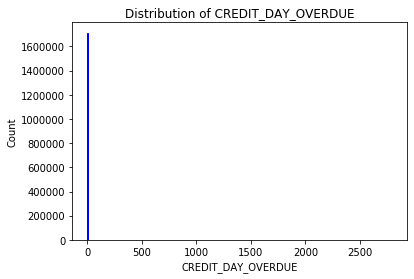

In [0]:
plt.hist(b['CREDIT_DAY_OVERDUE'], edgecolor = 'b', bins = 1000)
plt.title('Distribution of CREDIT_DAY_OVERDUE'); plt.xlabel('CREDIT_DAY_OVERDUE'); plt.ylabel('Count');

Observation: Most of the credits have close to 0 days overdue

In [0]:
b.shape[0] #total no of entries in table

1716428

In [0]:
b[b['CREDIT_DAY_OVERDUE']>0].shape[0] #entries which contain non zeroes value

4217

In [0]:
v=b['CREDIT_DAY_OVERDUE'].values
v=np.sort(v)
for i in range(99.,100,1):
  print(i,'percentile value is',v[int(len(v)*float(i)/100)])
print(100,'percentile value is',v[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile value is 2792


99% of values contain zero value.that means there is no overdue 99% of times.

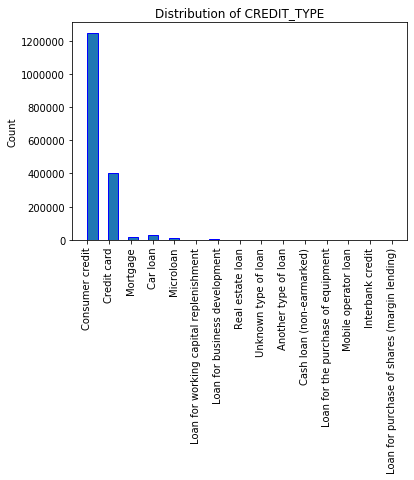

In [0]:
plt.hist(b['CREDIT_TYPE'], edgecolor = 'b',stacked=0, bins = 30)
plt.title('Distribution of CREDIT_TYPE')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: Consumer credit and Credit card are mostly registered credit in credit bureau. 

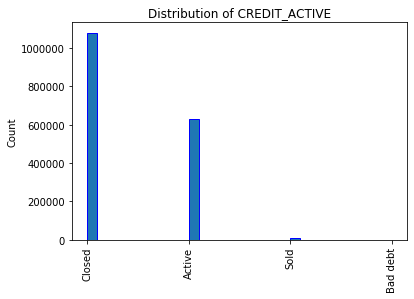

In [0]:

plt.hist(b['CREDIT_ACTIVE'], edgecolor = 'b',stacked=0, bins = 30)
plt.title('Distribution of CREDIT_ACTIVE')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: Most of the credit registered are in status closed. Sold and bad debt are very few.

In [0]:
bb=pd.read_csv('/content/bureau_balance.csv')

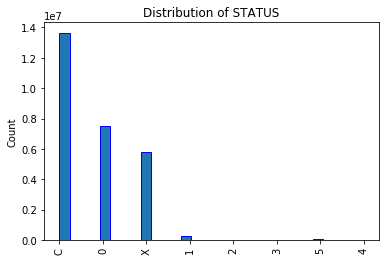

In [0]:
plt.hist(bb['STATUS'], edgecolor = 'b',stacked=0, bins = 30)#Status of Credit Bureau loan during the month 
#(active, closed, DPD0-30,à [C means closed, X means status unknown, 0 means no DPD, 
#1 means maximal did during month between 1-30, 2 means DPD 31-60,à 5 means DPD 120+ or sold or written off ] )
plt.title('Distribution of STATUS')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: Most of the times credit bureau status is closed for a month

**Features extraction in bureau_balance and bureau**

In [0]:
#function takes the bureau and related dataframe and add aggregated features,
#also merge it with bureau_balance dataframe
#https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
#https://www.linkedin.com/pulse/winning-9th-place-kaggles-biggest-competition-yet-home-levinson/
def b_new(buro):
    bureau_balance = reduce_mem_usage(pd.read_csv('bureau_balance.csv'))
    bureau_balance, col1 = one_hot(bureau_balance)
    bureau, col2= one_hot(buro)

    bureau_balance_agg = {'MONTHS_BALANCE': ['size']}
    for c in col1:
      bureau_balance_agg[c] = ['mean']
    aggregate = bureau_balance.groupby('SK_ID_BUREAU').agg(bureau_balance_agg)
    l=[]
    for i in aggregate.columns.tolist():
      l.append(i[0] + "_" + i[1].upper())
    
    aggregate.columns = pd.Index(l)
    bureau = bureau.join(aggregate, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del aggregate
    gc.collect()
    
    numerical_agg = {'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'DAYS_CREDIT': ['mean', 'var'],'DAYS_CREDIT_UPDATE': ['mean'],'CREDIT_DAY_OVERDUE': ['mean'],
        'DAYS_CREDIT_ENDDATE': ['mean'],'CNT_CREDIT_PROLONG': ['sum'],'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_ANNUITY': ['max', 'mean'],'AMT_CREDIT_SUM': ['mean', 'sum']
      }
    categorical_agg = {}
    for c in col2:
      categorical_agg[c] = ['mean']
    for c in col1:
      categorical_agg[c + "_MEAN"] = ['mean']
    
    b1 = bureau.groupby('SK_ID_CURR').agg({**numerical_agg, **categorical_agg})
    l=[]
    for i in b1.columns.tolist():
      l.append('BU_'+i[0]+'_'+i[1].upper())
    b1.columns = pd.Index(l)
     
    A = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    A_agg = A.groupby('SK_ID_CURR').agg(numerical_agg)
    l=[]
    for i in A_agg.columns.tolist():
      l.append('A_'+i[0]+'_'+i[1].upper())
    A_agg.columns = pd.Index(l)
    b1 = b1.join(A_agg, how='left', on='SK_ID_CURR')
    del A,A_agg
    gc.collect()

    C = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    C_agg = C.groupby('SK_ID_CURR').agg(numerical_agg)
    l=[]
    for i in C_agg.columns.tolist():
      l.append('C_'+i[0]+'_'+i[1].upper())
    C_agg.columns = pd.Index(l)
    b1 = b1.join(C_agg, how='left', on='SK_ID_CURR')
    del C, C_agg
    gc.collect()
  
    print(b1.shape)
    del bureau
    gc.collect()
    return(b1)


In [8]:

b=pd.read_csv('bureau.csv')
     
new = b_new(reduce_mem_usage(b))
df = df.join(new, how='left', on='SK_ID_CURR')
del new
gc.collect()

Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
(305811, 89)


0

**Previous application**

In [0]:
p=pd.read_csv('/content/previous_application.csv')

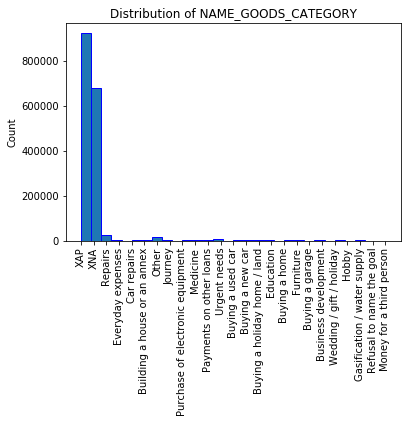

In [0]:

plt.hist(p['NAME_CASH_LOAN_PURPOSE'], edgecolor = 'b',stacked=0, bins = 30)
plt.title('Distribution of NAME_GOODS_CATEGORY')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation:Most applicant takes cash loans with a purpose of XAP and XNA.

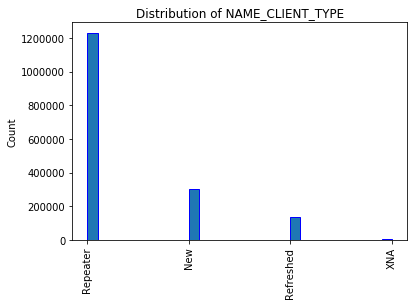

In [0]:

plt.hist(p['NAME_CLIENT_TYPE'], edgecolor = 'b',stacked=0, bins = 30)
plt.title('Distribution of NAME_CLIENT_TYPE')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: There are more no of repeaters when applying for the previous application.

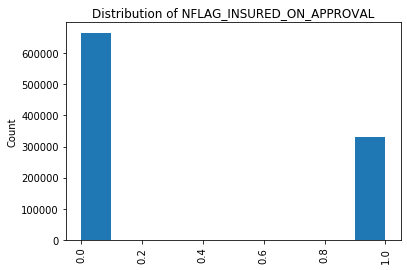

In [0]:
plt.hist(p['NFLAG_INSURED_ON_APPROVAL'])#Did the client requested insurance during the previous application
plt.title('Distribution of NFLAG_INSURED_ON_APPROVAL')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation:There are very less client who requested insurance during the previous application.

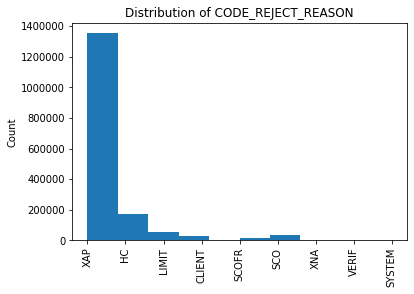

In [0]:
plt.hist(p['CODE_REJECT_REASON'])#Why was the previous application rejected
plt.title('Distribution of CODE_REJECT_REASON')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: Most of the times bank has given not applicable as the reason for rejecting the loan.

In [0]:
p['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [0]:
p[p['DAYS_TERMINATION']==365243]['DAYS_TERMINATION']

1          365243.0
2          365243.0
17         365243.0
21         365243.0
34         365243.0
             ...   
1669925    365243.0
1669945    365243.0
1669960    365243.0
1670192    365243.0
1670199    365243.0
Name: DAYS_TERMINATION, Length: 225913, dtype: float64

Observation: nearly 225913 values are outliers here in column DAYS_TERMINATION

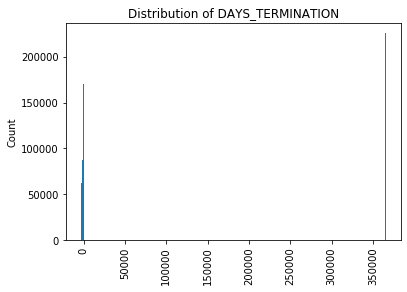

In [0]:
plt.hist(p['DAYS_TERMINATION'],bins = 1000)#Relative to application date of current application when was the expected termination of the previous application
plt.title('Distribution of DAYS_TERMINATION')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: The min value is -2874 and max value is 365243. 365243 is equal to 1000 years hence it is an outlier.

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


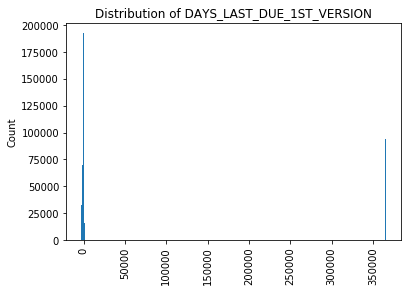

In [0]:
print(p['DAYS_LAST_DUE_1ST_VERSION'].describe())
plt.hist(p['DAYS_LAST_DUE_1ST_VERSION'],bins = 1000)#Relative to application date of current application when was the expected termination of the previous application
plt.title('Distribution of DAYS_LAST_DUE_1ST_VERSION')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: 365243 is an outlier here.

In [0]:
p['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [0]:
p[p['DAYS_FIRST_DRAWING']>0]['DAYS_FIRST_DRAWING']

0          365243.0
1          365243.0
2          365243.0
3          365243.0
5          365243.0
             ...   
1670209    365243.0
1670210    365243.0
1670211    365243.0
1670212    365243.0
1670213    365243.0
Name: DAYS_FIRST_DRAWING, Length: 934444, dtype: float64

In [0]:
p[p['DAYS_FIRST_DRAWING']==365243]['DAYS_FIRST_DRAWING']

0          365243.0
1          365243.0
2          365243.0
3          365243.0
5          365243.0
             ...   
1670209    365243.0
1670210    365243.0
1670211    365243.0
1670212    365243.0
1670213    365243.0
Name: DAYS_FIRST_DRAWING, Length: 934444, dtype: float64

In [0]:
p[p['DAYS_FIRST_DRAWING']<0]['DAYS_FIRST_DRAWING']

17         -277.0
34         -265.0
82         -479.0
93         -332.0
242        -225.0
            ...  
1669788    -863.0
1669830    -453.0
1669833    -596.0
1669960   -1083.0
1670192    -474.0
Name: DAYS_FIRST_DRAWING, Length: 62705, dtype: float64

All the values above 0 are 365243 and they all are outliers. Nearly 934444 values in DAYS_FIRST_DRAWING column are outliers except 62705 values which are less than 0.the min value here is -2922

In [0]:
p['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

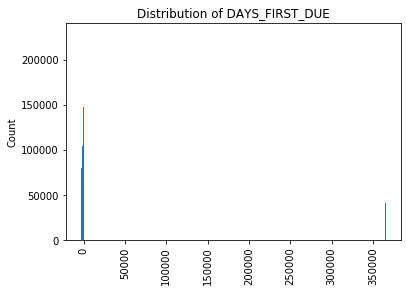

In [0]:
plt.hist(p['DAYS_FIRST_DUE'],bins = 1000)#Relative to application date of current application when was the expected termination of the previous application
plt.title('Distribution of DAYS_FIRST_DUE')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: 365243 is outlier here.

In [0]:
print('There are',sum(p['DAYS_FIRST_DUE']<0),'reasonable value DAYS_FIRST_DUE')
print("There are",sum(p['DAYS_FIRST_DUE']==365243),"outliers DAYS_FIRST_DUE")

There are 956504 reasonable value DAYS_FIRST_DUE
There are 40645 outliers DAYS_FIRST_DUE


In [0]:
print('There are',sum(p['DAYS_LAST_DUE']<0),'reasonable value in DAYS_LAST_DUE')
print("There are",sum(p['DAYS_LAST_DUE']==365243),"outliers in DAYS_LAST_DUE")

There are 785928 reasonable value in DAYS_LAST_DUE
There are 211221 outliers in DAYS_LAST_DUE


**Feature engineering for Previous application**

In [0]:
#function takes the previous_app and related dataframe and add aggregated features.
#https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
#https://www.linkedin.com/pulse/winning-9th-place-kaggles-biggest-competition-yet-home-levinson/
def previous_app(prev):
    p_app, p_app_cols = one_hot(prev)
    p_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    p_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    p_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    p_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    p_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    p_app['APP_CREDIT_PERC'] = p_app['AMT_APPLICATION'] / p_app['AMT_CREDIT']
    num_agg = {'AMT_DOWN_PAYMENT': ['max', 'mean'],'DAYS_DECISION': ['max', 'mean'],
                        'AMT_GOODS_PRICE': ['max', 'mean'],'AMT_ANNUITY': ['max', 'mean'],'HOUR_APPR_PROCESS_START': ['max', 'mean'],
        'RATE_DOWN_PAYMENT': ['max', 'mean'],'AMT_APPLICATION': ['max', 'mean'],
        'AMT_CREDIT': ['max', 'mean'],'APP_CREDIT_PERC': ['max', 'mean'],'CNT_PAYMENT': ['mean', 'sum'] 
          
    }
    cat_agg = {}
    for cat in p_app_cols:
        cat_agg[cat] = ['mean']
    
    P1 = p_app.groupby('SK_ID_CURR').agg({**num_agg, **cat_agg})
    l=[]
    for i in P1.columns.tolist():
      l.append('PR_'+i[0]+'_'+i[1].upper())
    P1.columns = pd.Index(l)
    A = p_app[p_app['NAME_CONTRACT_STATUS_Approved'] == 1]
    A_agg = A.groupby('SK_ID_CURR').agg(num_agg)
    l=[]
    for i in A_agg.columns.tolist():
      l.append('APP_'+i[0]+'_'+i[1].upper())
    A_agg.columns = pd.Index(l)
    P1 = P1.join(A_agg, how='left', on='SK_ID_CURR')
    R = p_app[p_app['NAME_CONTRACT_STATUS_Refused'] == 1]
    R_agg = R.groupby('SK_ID_CURR').agg(num_agg)
    l=[]
    for i in R_agg.columns.tolist():
      l.append('REF_'+i[0]+'_'+i[1].upper())
    
    R_agg.columns = pd.Index(l)
    P1 = P1.join(R_agg, how='left', on='SK_ID_CURR')
    del R, R_agg, A, A_agg, p_app
    gc.collect()
    print(P1.shape)
    return P1


In [11]:
  # idea refered from https://www.kaggle.com/c/home-credit-default-risk/discussion/64593
  pr = pd.read_csv('previous_application.csv')

  frame = previous_app(reduce_mem_usage(pr))
  df = df.join(frame, how='left', on='SK_ID_CURR')
  del frame
  gc.collect()

  frame = reduce_mem_usage(pr[pr.DAYS_DECISION  >=-365].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = previous_app(frame)
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_year')
  del frame
  gc.collect()
  
  frame = reduce_mem_usage(pr[pr.DAYS_DECISION  >=-182].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = previous_app(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_halfyear')
  del frame
  gc.collect()

  frame = reduce_mem_usage(pr[pr.DAYS_DECISION  >=-92].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = previous_app(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_quarter')
  del frame
  gc.collect()

  frame = reduce_mem_usage(pr[pr.DAYS_DECISION  >=-31].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = previous_app(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_month')
  del frame
  gc.collect()

  frame = reduce_mem_usage(pr[pr.DAYS_DECISION  >=-8].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = previous_app(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_week')
  del frame
  gc.collect()

Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
(338857, 219)
Memory usage of dataframe is 110.53 MB
Memory usage after optimization is: 108.34 MB
Decreased by 2.0%
(195522, 216)
Memory usage of dataframe is 42.63 MB
Memory usage after optimization is: 41.78 MB
Decreased by 2.0%
(103914, 213)
Memory usage of dataframe is 17.44 MB
Memory usage after optimization is: 17.01 MB
Decreased by 2.5%
(52584, 210)
Memory usage of dataframe is 7.42 MB
Memory usage after optimization is: 7.23 MB
Decreased by 2.5%
(23184, 208)
Memory usage of dataframe is 1.92 MB
Memory usage after optimization is: 1.88 MB
Decreased by 2.5%
(6135, 206)


0

**POS_CASH_balance**

In [0]:
pc=pd.read_csv('/content/POS_CASH_balance.csv')
pc

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


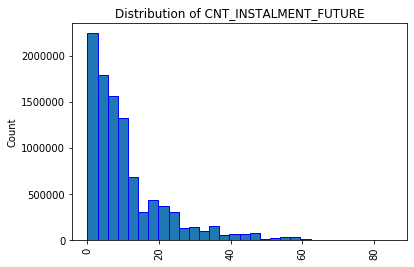

In [0]:
plt.hist(pc['CNT_INSTALMENT_FUTURE'], edgecolor = 'b',stacked=0, bins = 30)#Installments left to pay on the previous credit
plt.title('Distribution of CNT_INSTALMENT_FUTURE')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: installments left to pay mostly falls in the bracket of 0-20.

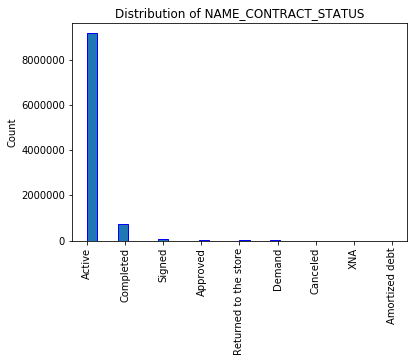

In [0]:
plt.hist(pc['NAME_CONTRACT_STATUS'], edgecolor = 'b',stacked=0, bins = 30)
plt.title('Distribution of NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
a=plt.ylabel('Count')

Observation: Most of the time name contract status is Active

**Feature engineering on POS_CASH_balance**

In [0]:
#function takes the posh_cash and related dataframe and add aggregated features.
#https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
#https://www.linkedin.com/pulse/winning-9th-place-kaggles-biggest-competition-yet-home-levinson/
def pos_cash(pos):
    pos_ch, col = one_hot(pos)
    aggregate = {'SK_DPD_DEF': ['max', 'mean'],'SK_DPD': ['max', 'mean'],
        'MONTHS_BALANCE': ['max', 'mean', 'size']
        
    }
    for c in col:
        aggregate[c] = ['mean']
    
    A_agg = pos_ch.groupby('SK_ID_CURR').agg(aggregate)
    l=[]
    for i in A_agg.columns.tolist():
      l.append('POS_'+i[0] + '_' + i[1].upper())
    A_agg.columns = pd.Index(l)
    A_agg['POS_no_COUNT'] = pos_ch.groupby('SK_ID_CURR').size()

    value=pos_ch.groupby('SK_ID_CURR')['MONTHS_BALANCE'].min()
    A_agg['MIN_VALUES']=pos_ch['SK_ID_CURR'].map(value)
    A_agg['MULTIPLIER']=1.00-pos_ch['MONTHS_BALANCE']/A_agg['MIN_VALUES']
    print(A_agg.shape)
    del pos_ch
    gc.collect()
    return A_agg

In [13]:
    # idea refered from https://www.kaggle.com/c/home-credit-default-risk/discussion/64593
  c = reduce_mem_usage(pd.read_csv('POS_CASH_balance.csv'))
  frame = pos_cash(c)
  df = df.join(frame, how='left', on='SK_ID_CURR')
  del frame
  gc.collect()
        
  frame = reduce_mem_usage(c[c.MONTHS_BALANCE >=-12].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = pos_cash(frame)
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_year')
  del frame
  gc.collect()
  
  frame = reduce_mem_usage(c[c.MONTHS_BALANCE >=-6].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = pos_cash(frame)
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_halfyear')
  del frame
  gc.collect()

  frame = reduce_mem_usage(c[c.MONTHS_BALANCE >=-3].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = pos_cash(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_quarter')
  del frame
  gc.collect()

  frame = reduce_mem_usage(c[c.MONTHS_BALANCE >=-1].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = pos_cash(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_month')
  del frame
  gc.collect()


Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
(337252, 20)
Memory usage of dataframe is 73.51 MB
Memory usage after optimization is: 64.60 MB
Decreased by 12.1%
(240235, 19)
Memory usage of dataframe is 33.01 MB
Memory usage after optimization is: 29.00 MB
Decreased by 12.1%
(192077, 19)
Memory usage of dataframe is 14.10 MB
Memory usage after optimization is: 12.39 MB
Decreased by 12.1%
(161387, 19)
Memory usage of dataframe is 2.99 MB
Memory usage after optimization is: 2.62 MB
Decreased by 12.1%
(79744, 18)


0

**Feature engineering on installments payments**

In [0]:
#function takes the install_payments and related dataframe and add aggregated features.
#https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
#https://www.linkedin.com/pulse/winning-9th-place-kaggles-biggest-competition-yet-home-levinson/
def inst_pay(ins):
    A, col = one_hot(ins)
    
    aggregate = {'days_late_on_payment': ['max','mean','min','sum'],'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'NUM_INSTALMENT_VERSION': ['nunique'],'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'amount_extra_paid': ['max','mean','min','sum'],'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']     
    }
    for c in col:
        aggregate[c] = ['mean']
    A_agg = A.groupby('SK_ID_CURR').agg(aggregate)
    l=[]
    for i in A_agg.columns.tolist():
      l.append('INS_'+i[0]+'_'+i[1].upper())
    A_agg.columns = pd.Index(l)
    A_agg['INSTAL_no_COUNT'] = A.groupby('SK_ID_CURR').size()
    del A
    gc.collect()
    print(A_agg.shape)
    return A_agg

In [15]:
    # idea refered from https://www.kaggle.com/c/home-credit-default-risk/discussion/64593
  i=pd.read_csv('installments_payments.csv')
  i['DAYS_ENTRY_PAYMENT'].fillna(100, inplace=True)
  i['AMT_PAYMENT'].fillna(0.0, inplace=True)
  i['days_late_on_payment']=i.DAYS_ENTRY_PAYMENT-i.DAYS_INSTALMENT
  i['amount_extra_paid']=i.AMT_PAYMENT-i.AMT_INSTALMENT
  i = reduce_mem_usage(i)
  frame = inst_pay(i)
  df = df.join(frame, how='left', on='SK_ID_CURR')
  del frame
  gc.collect()

  frame = reduce_mem_usage(i[i.DAYS_INSTALMENT  >=-365].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = inst_pay(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_year')
  del frame
  gc.collect()

  frame = reduce_mem_usage(i[i.DAYS_INSTALMENT  >=-182].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = inst_pay(frame)       
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_halfyear')
  del frame
  gc.collect()

  frame = reduce_mem_usage(i[i.DAYS_INSTALMENT  >=-92].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = inst_pay(frame)       
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_quarter')
  del frame
  gc.collect()

  frame = reduce_mem_usage(i[i.DAYS_INSTALMENT  >=-31].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = inst_pay(frame)       
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_month')
  del frame
  gc.collect()

  frame = reduce_mem_usage(i[i.DAYS_INSTALMENT  >=-8].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = inst_pay(frame)       
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_week')
  del frame
  gc.collect()


Memory usage of dataframe is 1038.01 MB
Memory usage after optimization is: 389.25 MB
Decreased by 62.5%
(339587, 20)
Memory usage of dataframe is 124.89 MB
Memory usage after optimization is: 111.74 MB
Decreased by 10.5%
(252761, 20)
Memory usage of dataframe is 60.96 MB
Memory usage after optimization is: 54.54 MB
Decreased by 10.5%
(211804, 20)
Memory usage of dataframe is 28.81 MB
Memory usage after optimization is: 25.78 MB
Decreased by 10.5%
(186521, 20)
Memory usage of dataframe is 8.38 MB
Memory usage after optimization is: 7.50 MB
Decreased by 10.5%
(153389, 20)
Memory usage of dataframe is 1.38 MB
Memory usage after optimization is: 1.24 MB
Decreased by 10.5%
(33009, 20)


0

**credit_card_balance**

In [0]:
cc=pd.read_csv('credit_card_balance.csv')

In [0]:
sum(cc['CNT_INSTALMENT_MATURE_CUM']==0)

551467

551467 times the paid installments are zero on the prrevious credit.

In [0]:
print(cc['CNT_INSTALMENT_MATURE_CUM'].describe())

count    3.535076e+06
mean     2.082508e+01
std      2.005149e+01
min      0.000000e+00
25%      4.000000e+00
50%      1.500000e+01
75%      3.200000e+01
max      1.200000e+02
Name: CNT_INSTALMENT_MATURE_CUM, dtype: float64


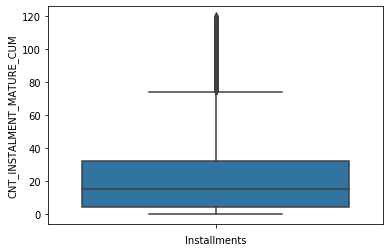

In [0]:
sns.boxplot(y='CNT_INSTALMENT_MATURE_CUM', data=cc)
plt.xlabel('Installments')
plt.show()

Observation: 75% of the paid installments on the previous credit are below 40. 

**Feature engineering on credit credit balance**

In [0]:
#function takes the credit_card and related dataframe and add aggregated features.
def credit_card(cre):
    credit_card, col = one_hot(cre)
    credit_card.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    credit_card_agg = credit_card.groupby('SK_ID_CURR').agg(['max', 'mean', 'sum', 'var'])
    l=[]
    for i in credit_card_agg.columns.tolist():
      l.append('CR_'+i[0]+'_'+i[1].upper())
    credit_card_agg.columns = pd.Index(l)
    # Count credit card lines
    credit_card_agg['CR_no_COUNT'] = credit_card.groupby('SK_ID_CURR').size()
    print(credit_card_agg.shape)
    del credit_card
    gc.collect()
    return credit_card_agg

In [17]:
    # idea refered from https://www.kaggle.com/c/home-credit-default-risk/discussion/64593
  cr=pd.read_csv('credit_card_balance.csv')
  frame = credit_card(reduce_mem_usage(cr))
  df = df.join(frame, how='left', on='SK_ID_CURR')
  del frame
  gc.collect()

  frame = reduce_mem_usage(cr[cr.MONTHS_BALANCE >=-12].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = credit_card(frame)     
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_year')
  del frame
  gc.collect()

  frame = reduce_mem_usage(cr[cr.MONTHS_BALANCE >=-6].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = credit_card(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_halfyear')
  del frame
  gc.collect()

  frame = reduce_mem_usage(cr[cr.MONTHS_BALANCE >=-3].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = credit_card(frame)     
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_quarter')
  del frame
  gc.collect()

  frame = reduce_mem_usage(cr[cr.MONTHS_BALANCE >=-1].reset_index())
  frame.drop(['index'],axis=1,inplace=True)
  frame = credit_card(frame)      
  df = df.join(frame, how='left', on='SK_ID_CURR',rsuffix='_month')
  del frame
  gc.collect()

Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
(103558, 113)
Memory usage of dataframe is 88.60 MB
Memory usage after optimization is: 84.53 MB
Decreased by 4.6%
(103558, 101)
Memory usage of dataframe is 46.35 MB
Memory usage after optimization is: 44.22 MB
Decreased by 4.6%
(103556, 101)
Memory usage of dataframe is 21.35 MB
Memory usage after optimization is: 20.37 MB
Decreased by 4.6%
(100677, 101)
Memory usage of dataframe is 5.17 MB
Memory usage after optimization is: 4.94 MB
Decreased by 4.6%
(61885, 101)


0

**Selecting top 300 features**

In [18]:
df = reduce_mem_usage(df)


Memory usage of dataframe is 4718.39 MB
Memory usage after optimization is: 1996.12 MB
Decreased by 57.7%


In [0]:
import pickle
"""
with open('new_data.pickle', 'wb') as handle:
    pickle.dump(df, handle)
"""
with open('new_data.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [0]:
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Xsp = (train_df.loc[:, train_df.columns != 'TARGET']) 
ysp = (train_df['TARGET'] )



In [0]:
Xsp=np.nan_to_num(Xsp)

**Splitting the dataset into train, cv and test.**

In [0]:
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(Xsp, ysp, test_size=0.10, stratify=ysp)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.10, stratify=y_1)

In [7]:
del df,Xsp,train_df
gc.collect()

0

In [42]:
print(X_tr.shape, y_tr.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(248850, 2336) (248850,)
(27650, 2336) (27650,)
(30723, 2336) (30723,)


In [0]:
S = SelectKBest(f_classif, k=300)
X_tr=S.fit_transform(X_tr, y_tr)



In [0]:
X_cv=S.transform(X_cv)
X_test=S.transform(X_test)

**Checking the distribution of target variable into train,cv and test.**

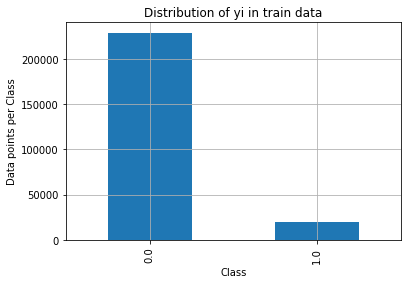

Number of data points in class 1 : 228760 ( 91.927 %)
Number of data points in class 2 : 20090 ( 8.073 %)
--------------------------------------------------------------------------------


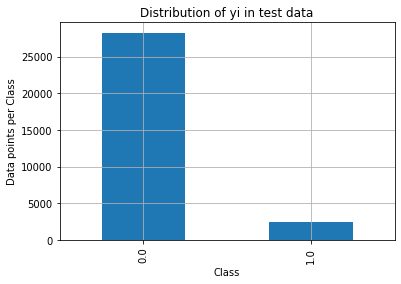

Number of data points in class 1 : 28243 ( 91.928 %)
Number of data points in class 2 : 2480 ( 8.072 %)
--------------------------------------------------------------------------------


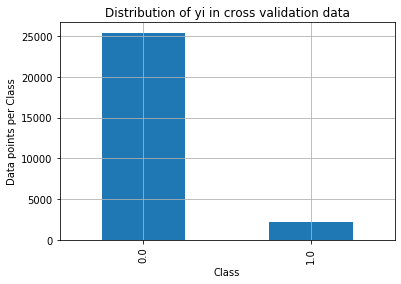

Number of data points in class 1 : 25418 ( 91.928 %)
Number of data points in class 2 : 2232 ( 8.072 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_tr.value_counts()
test_class_distribution = y_test.value_counts()
cv_class_distribution = y_cv.value_counts()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_tr.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


### **Logistic Regression**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
scaler_train = scaler.transform(X_tr)
scaler_cv = scaler.transform(X_cv)
scaler_test = scaler.transform(X_test)

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from tqdm import tqdm

100%|██████████| 6/6 [05:52<00:00, 48.31s/it]


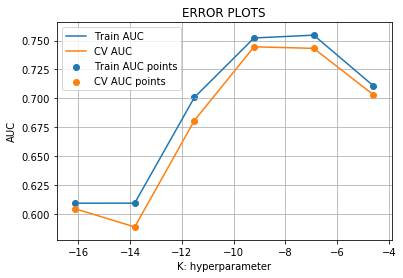

In [0]:
train_auc = []
cv_auc = []
K = {'alpha': [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2]}
for i in tqdm(K['alpha']):
    neigh = linear_model.SGDClassifier(loss='log',alpha=i,penalty='l1')
    neigh.fit(scaler_train, y_tr)

    y_train_pred = batch_predict(neigh, scaler_train)    
    y_cv_pred = batch_predict(neigh, scaler_cv)
     
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['alpha']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=10**-3

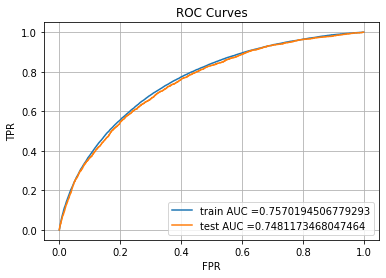

In [33]:
from sklearn.metrics import roc_curve, auc

neigh = linear_model.SGDClassifier(loss='log',alpha=best_par1,class_weight='balanced',penalty='l1')
neigh.fit(scaler_train, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh,  scaler_train)    
y_test_pred = batch_predict(neigh, scaler_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.grid()
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    # print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

**Train**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

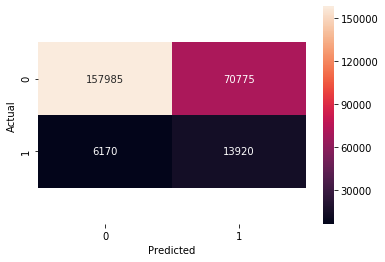

In [35]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


**Test**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

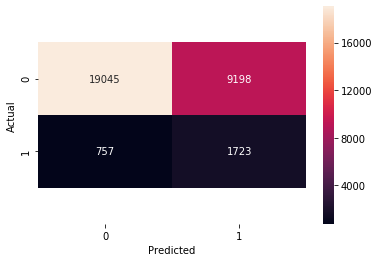

In [36]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


### **XGBoost**

In [1]:
from sklearn.model_selection import StratifiedKFold 

k=StratifiedKFold(n_splits=3, shuffle=True)
print(k)

StratifiedKFold(n_splits=3, random_state=None, shuffle=True)


In [21]:
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [700,800,900,1000]
learning_rate = [ 0.02,0.05,0.07]
max_depth = [6,7,8,9]

param = dict(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth)
xgb = XGBClassifier(nthread=-1)
kfold = StratifiedKFold(n_splits=3, shuffle=True)
random_search_cv = RandomizedSearchCV(xgb, param, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
result = random_search_cv.fit(scaler_train , y_tr)

print("Best mean_test_score: ", result.best_score_ ,"parameters",result.best_params_ )
mean = result.cv_results_['mean_test_score']
std = result.cv_results_['std_test_score']
par = result.cv_results_['params']
for m, s, p in zip(mean, std, par):
    print( 'mean_test_score',m,'std_test_score',s,'params',p)    


Best mean_test_score:  -0.2406262771923414 parameters {'n_estimators': 800, 'max_depth': 6, 'learning_rate': 0.05}
mean_test_score -0.24465255370463834 std_test_score 0.0008739492716115714 params {'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.05}
mean_test_score -0.24186662961652886 std_test_score 0.0007838895703288978 params {'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.05}
mean_test_score -0.24631985675540405 std_test_score 0.000790347957465164 params {'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.07}
mean_test_score -0.24428878322120132 std_test_score 0.0007794105997974142 params {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.07}
mean_test_score -0.2448484095207295 std_test_score 0.0007974006162268901 params {'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.07}
mean_test_score -0.24913924356126568 std_test_score 0.0006932261691023411 params {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.05}
mean_test_score -0.26776792527319

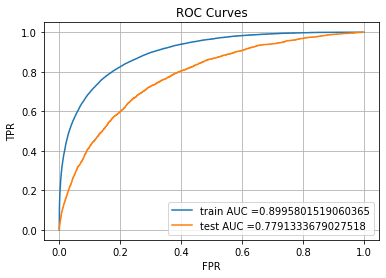

In [30]:
from sklearn.metrics import roc_curve, auc
from xgboost.sklearn import XGBClassifier 
neigh = XGBClassifier(n_estimators=800,max_depth=6,learning_rate=0.05,
                      )
neigh.fit(scaler_train, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, scaler_train)    
y_test_pred = batch_predict(neigh, scaler_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.grid()
plt.show()

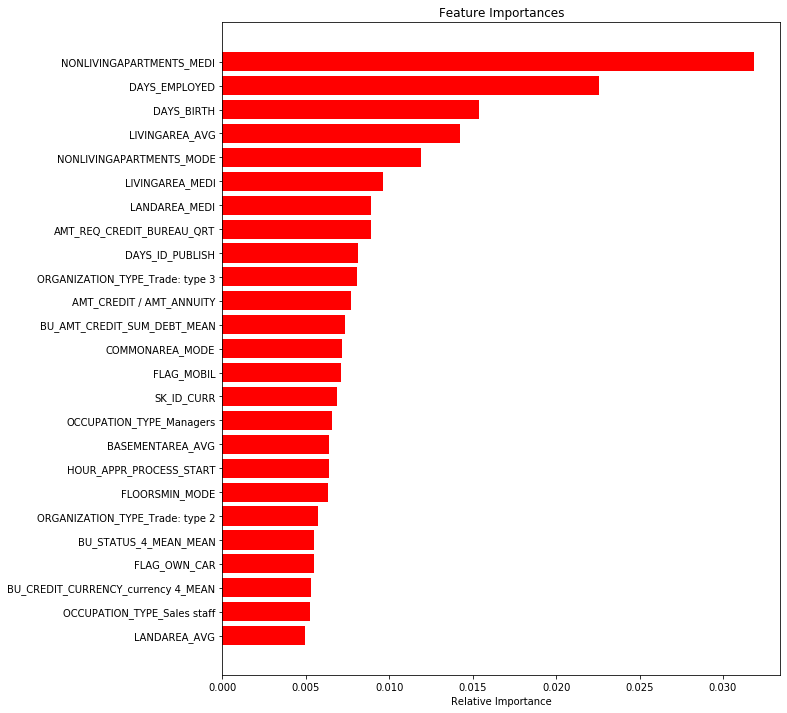

In [19]:
import matplotlib.pyplot as plt
features =train_df.columns
importances = neigh.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Train**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

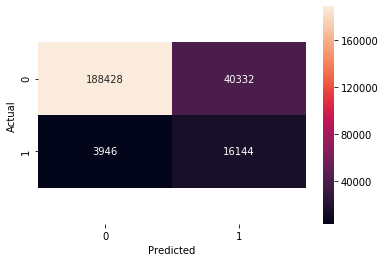

In [20]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


**test**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

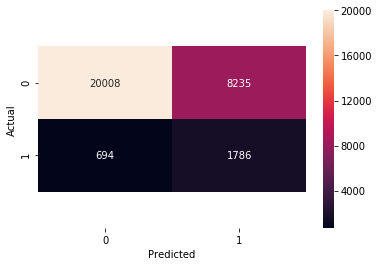

In [21]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


### **Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [500,600,700,800]
max_depth = [9,10,11,12]

param = dict(n_estimators=n_estimators,max_depth=max_depth)
xgb = RandomForestClassifier(n_jobs=-1)
kfold = StratifiedKFold(n_splits=3, shuffle=True)
random_search_cv = RandomizedSearchCV(xgb, param, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
result = random_search_cv.fit(scaler_train , y_tr)

print("Best mean_test_score: ", result.best_score_ ,"parameters",result.best_params_ )
mean = result.cv_results_['mean_test_score']
std = result.cv_results_['std_test_score']
par = result.cv_results_['params']
for m, s, p in zip(mean, std, par):
    print( 'mean_test_score',m,'std_test_score',s,'params',p)    


Best mean_test_score:  -0.2536874293927612 parameters {'n_estimators': 800, 'max_depth': 12}
mean_test_score -0.254615364761944 std_test_score 0.0002823405537752798 params {'n_estimators': 500, 'max_depth': 11}
mean_test_score -0.25651790067081387 std_test_score 0.0001920862401660547 params {'n_estimators': 500, 'max_depth': 9}
mean_test_score -0.2565721240025001 std_test_score 0.0003010964807867514 params {'n_estimators': 600, 'max_depth': 9}
mean_test_score -0.255477673191798 std_test_score 0.0001977923024301139 params {'n_estimators': 800, 'max_depth': 10}
mean_test_score -0.25376309773251715 std_test_score 0.0002614216605694983 params {'n_estimators': 600, 'max_depth': 12}
mean_test_score -0.2536874293927612 std_test_score 0.000288791520100807 params {'n_estimators': 800, 'max_depth': 12}
mean_test_score -0.2554554413614863 std_test_score 0.00010584947643292523 params {'n_estimators': 700, 'max_depth': 10}
mean_test_score -0.25379525139531606 std_test_score 0.00021145300208143608 p

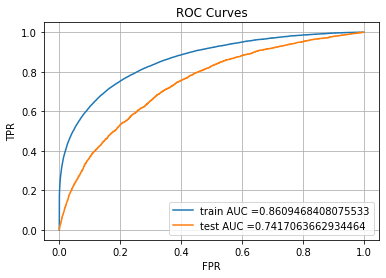

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
neigh = RandomForestClassifier(n_estimators=800,max_depth=12)

neigh.fit(scaler_train, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, scaler_train)    
y_test_pred = batch_predict(neigh, scaler_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.grid()
plt.show()

**Train**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

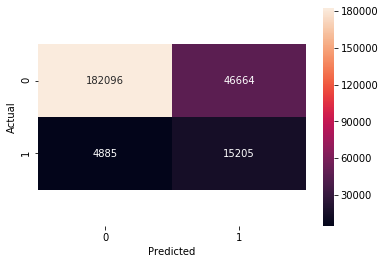

In [25]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


**test**

Train confusion matrix


Text(33.0, 0.5, 'Actual')

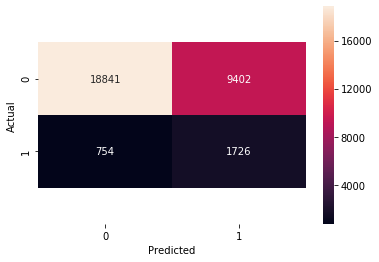

In [26]:
import seaborn as sns
print("Train confusion matrix")
ax=sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")


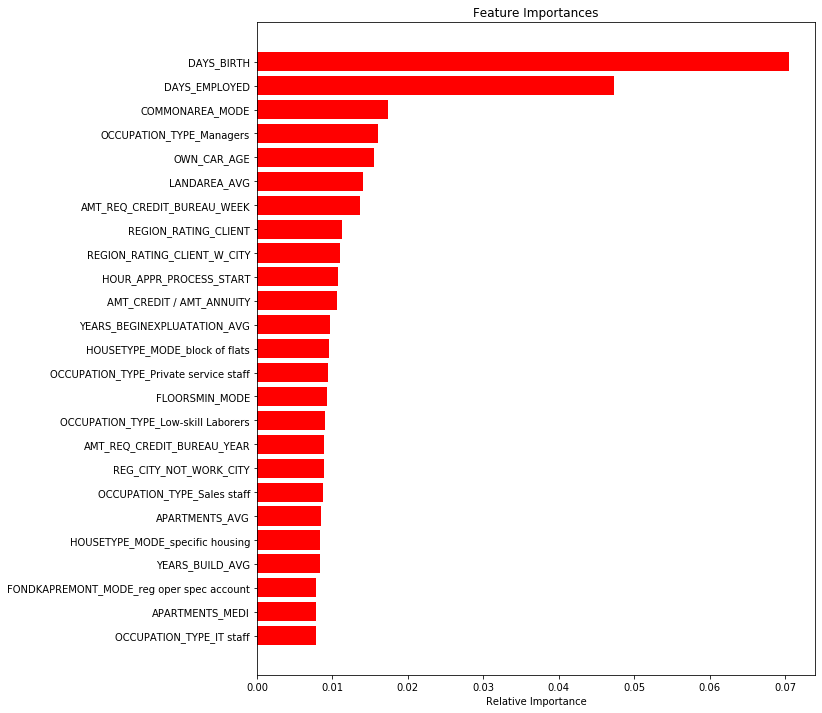

In [29]:
import matplotlib.pyplot as plt
features = train_df.columns
importances = neigh.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Hyper parameter tuning using BayesianOptimization**

- Bayesian optimization methods build a probability model of the objective function to propose smarter choices for the next set of hyperparameters to evaluate. hence reduce the tuning time for hyperparameters.


In [22]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=d476f4cd72ce4ba849bb66887908a3f60d92da283cb0b8d59444dd266ba3fcc4
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [3]:
#https://www.kaggle.com/returnofsputnik/bayes-opt-again/code
#https://www.dlology.com/blog/how-to-do-hyperparameter-search-with-baysian-optimization-for-keras-model/
import lightgbm as lgb
from bayes_opt import BayesianOptimization
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]
y = train_df['TARGET']

data = lgb.Dataset(data=train_df, label=y)

def parameters(num_iterations,num_leaves, feature_fraction, max_depth, min_split_gain, min_child_weight,learning_rate):
  params = {'application':'binary','early_stopping_round':100, 'metric':'auc'}
  params['num_iterations']=int(round(num_iterations))
  params["num_leaves"] = int(round(num_leaves))
  params["learning_rate"] = learning_rate
  params['feature_fraction'] = max(min(feature_fraction, 1), 0)
  params['max_depth'] = int(round(max_depth))
  params['min_split_gain'] = min_split_gain
  params['min_child_weight'] = min_child_weight
  
  cv_result = lgb.cv(params, data, nfold=5,seed=6, stratified=True, metrics=['auc'])
  return max(cv_result['auc-mean'])

optimizer = BayesianOptimization(parameters, {'num_iterations':(9800,11000),
                                            'num_leaves':(16,48),
                                            'feature_fraction':(0.1,0.5),
                                            'max_depth': (6,12),
                                            'min_split_gain':(0.001,0.1),
                                            'min_child_weight': (20,60),
                                            'learning_rate':(0.01,0.07)                                   
                                            })
    
optimizer.maximize(init_points=30, n_iter=30)
    
print(optimizer.max) 


|   iter    |  target   | featur... | learni... | max_depth | min_ch... | min_sp... | num_it... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        |  1.0      |  0.1895   |  0.03089  |  9.253    |  28.32    |  0.06894  |  1.078e+0 |  28.33    |
|  2        |  1.0      |  0.4026   |  0.05044  |  6.33     |  39.45    |  0.09028  |  1.051e+0 |  26.69    |
|  3        |  1.0      |  0.2039   |  0.03873  |  11.05    |  22.67    |  0.005001 |  1.098e+0 |  26.39    |
|  4        |  1.0      |  0.1684   |  0.03317  |  6.978    |  49.63    |  0.02587  |  9.879e+0 |  27.18    |
|  5        |  1.0      |  0.2845   |  0.03154  |  6.63     |  51.96    |  0.0845   |  1.017e+0 |  33.57    |
|  6        |  1.0      |  0.2323   |  0.04324  |  9.304    |  24.97    |  0.03821  |  1.06e+04 |  28.55    |
|  7        |  1.0      |  0.1349   |  0.0657   |  10.06    |  45.71    |  0.09596  |  1.014e+0 |  38.51    |
|  8      

In [0]:
#df = reduce_mem_usage(df)
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

**5 k-cross validation**

In [0]:
f=KFold(n_splits=5,shuffle=True,random_state=101) #K fold cross validation

imp = pd.DataFrame()
y=train_df['TARGET']


In [0]:
feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
imp['feat']=feats 

In [0]:
#hold outputs of training, testing and cv data
train_predict = np.zeros(train_df.shape[0])
cv_predict = np.zeros(train_df.shape[0])
test_predict = np.zeros(test_df.shape[0])


### Training on LGBM

**Advantages:**
- Fast training efficiency because of histogram binning.
- Better accuracy because of leaf wise growth.
- Low memory usage because it replaces continuous values to discrete bins which result in lower memory usage

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.232201	training's auc: 0.808008	valid_1's binary_logloss: 0.238822	valid_1's auc: 0.783734
[400]	training's binary_logloss: 0.221999	training's auc: 0.829656	valid_1's binary_logloss: 0.235378	valid_1's auc: 0.790304
[600]	training's binary_logloss: 0.214971	training's auc: 0.845904	valid_1's binary_logloss: 0.2344	valid_1's auc: 0.792506
[800]	training's binary_logloss: 0.209216	training's auc: 0.859239	valid_1's binary_logloss: 0.234029	valid_1's auc: 0.793573
[1000]	training's binary_logloss: 0.203746	training's auc: 0.871157	valid_1's binary_logloss: 0.233905	valid_1's auc: 0.794003
[1200]	training's binary_logloss: 0.198746	training's auc: 0.881801	valid_1's binary_logloss: 0.23385	valid_1's auc: 0.794227
[1400]	training's binary_logloss: 0.194011	training's auc: 0.891363	valid_1's binary_logloss: 0.233793	valid_1's auc: 0.794585
[1600]	training's binary_logloss: 0.189509	training's a

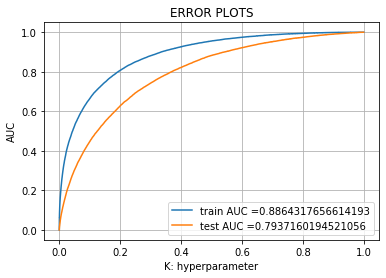

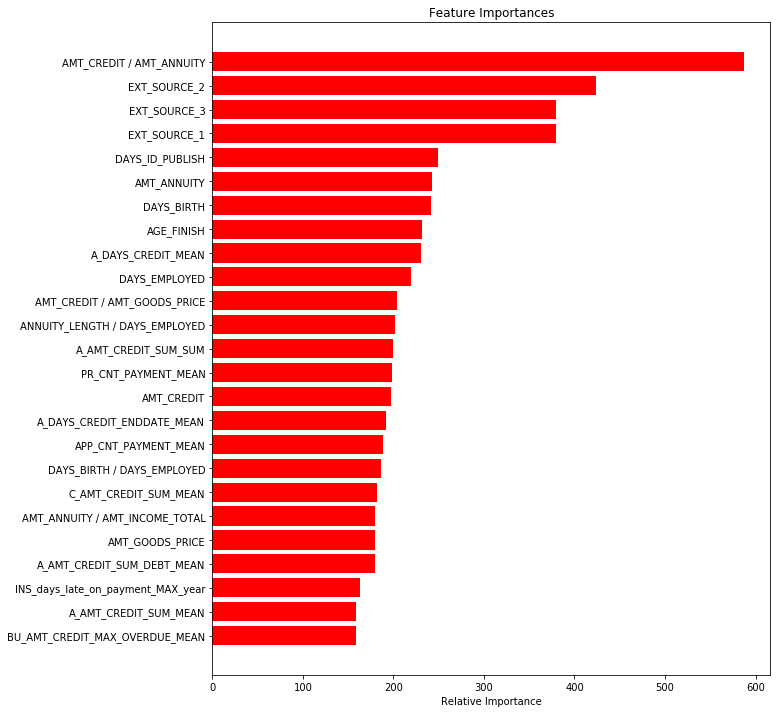

In [26]:

import pickle
a=0
for i,(train, cv) in enumerate(f.split(train_df[feats],y)):
  X_train, Y_train = train_df[feats].iloc[train], y.iloc[train]
  X_valid, Y_valid = train_df[feats].iloc[cv], y.iloc[cv]

  lgb = LGBMClassifier(
            nthread=4,
            n_estimators=10780,
            learning_rate=0.03,
            num_leaves=28,
            feature_fraction=0.1894,#lgbm will select 30 % of the features before training each tree.
            max_depth=9,
            min_split_gain=0.06,
            min_child_weight=28,
            silent=1,
            verbose=-1, )
  lgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)
  a=a+1
  train_predict[train] = lgb.predict_proba(X_train, num_iteration=lgb.best_iteration_)[:, 1]
  cv_predict[cv]=lgb.predict_proba(X_valid, num_iteration=lgb.best_iteration_)[:, 1]
  test_predict += lgb.predict_proba(test_df[feats], num_iteration=lgb.best_iteration_)[:, 1] / 5
  with open('model'+ str(a) +'.pickle', 'wb') as handle:
    pickle.dump(lgb, handle)

  #train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, train_predict)
  #test_fpr, test_tpr, te_thresholds = roc_curve(Y_valid, cv_predict)
  
  imp["imp"] = lgb.feature_importances_
  imp["fold"] = i + 1
  print('Fold ',i + 1,' TRAIN AUC : ',roc_auc_score(Y_train, train_predict[train]))
  print('Fold ',i + 1,' CV AUC : ',roc_auc_score(Y_valid, cv_predict[cv]))
        
  
  del lgb, X_train, Y_train, X_valid, Y_valid
  gc.collect()  
     
print('Full TRAIN AUC score ',roc_auc_score(y, train_predict))
print('Full CV AUC score ',roc_auc_score(y, cv_predict))
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y, train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y, cv_predict)

test_df['TARGET'] = test_predict
test_df[['SK_ID_CURR', 'TARGET']].to_csv('gbvh.csv', index= False)

#plot auc curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#plot imp features
features = imp["feat"]
importances = imp["imp"]
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**10 K-cross validation**

In [0]:
#df = reduce_mem_usage(df)
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

In [0]:
f=KFold(n_splits=10,shuffle=True,random_state=101) #K fold cross validation

imp = pd.DataFrame()
y=train_df['TARGET']


In [0]:
feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
imp['feat']=feats 

In [0]:
#hold outputs of training, testing and cv data
train_predict = np.zeros(train_df.shape[0])
cv_predict = np.zeros(train_df.shape[0])
test_predict = np.zeros(test_df.shape[0])

Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.805515	training's binary_logloss: 0.233324	valid_1's auc: 0.785091	valid_1's binary_logloss: 0.234858
[400]	training's auc: 0.826001	training's binary_logloss: 0.223731	valid_1's auc: 0.791965	valid_1's binary_logloss: 0.2313
[600]	training's auc: 0.841262	training's binary_logloss: 0.217189	valid_1's auc: 0.794498	valid_1's binary_logloss: 0.230281
[800]	training's auc: 0.853978	training's binary_logloss: 0.21174	valid_1's auc: 0.795447	valid_1's binary_logloss: 0.229932
[1000]	training's auc: 0.865362	training's binary_logloss: 0.206725	valid_1's auc: 0.796086	valid_1's binary_logloss: 0.22967
[1200]	training's auc: 0.875695	training's binary_logloss: 0.201986	valid_1's auc: 0.796195	valid_1's binary_logloss: 0.229556
Early stopping, best iteration is:
[1086]	training's auc: 0.870024	training's binary_logloss: 0.204616	valid_1's auc: 0.796378	valid_1's binary_logloss: 0.229547
Fold  1  TRAIN AUC : 

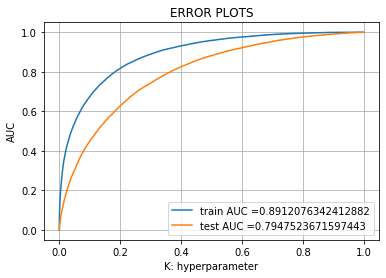

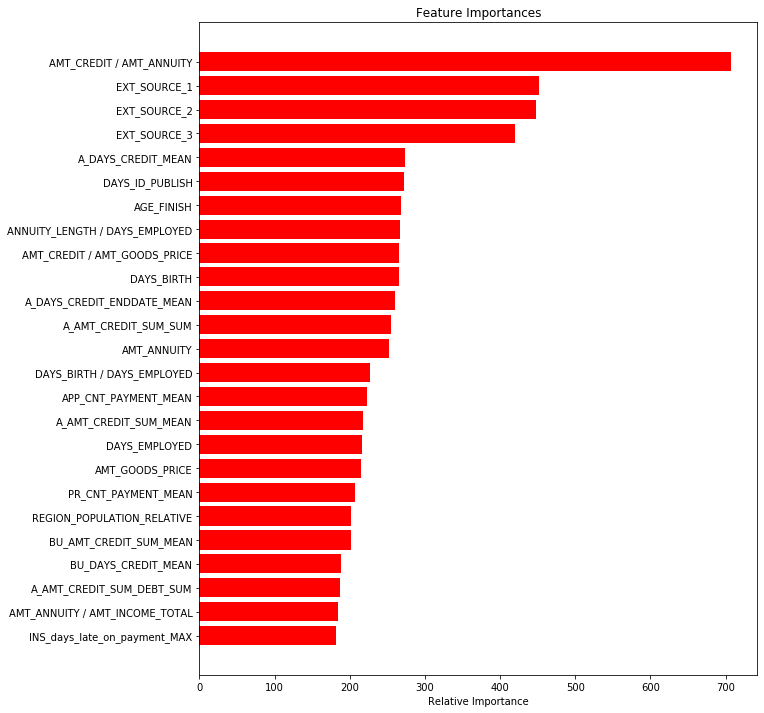

In [10]:

import pickle
a=0
for i,(train, cv) in enumerate(f.split(train_df[feats],y)):
  X_train, Y_train = train_df[feats].iloc[train], y.iloc[train]
  X_valid, Y_valid = train_df[feats].iloc[cv], y.iloc[cv]

  lgb = LGBMClassifier(
            nthread=4,
            n_estimators=10780,
            learning_rate=0.03,
            num_leaves=28,
            feature_fraction=0.1894,#lgbm will select 30 % of the features before training each tree.
            max_depth=9,
            min_split_gain=0.06,
            min_child_weight=28,
            silent=1,
            verbose=-1, )
  lgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)
  a=a+1
  train_predict[train] = lgb.predict_proba(X_train, num_iteration=lgb.best_iteration_)[:, 1]
  cv_predict[cv]=lgb.predict_proba(X_valid, num_iteration=lgb.best_iteration_)[:, 1]
  test_predict += lgb.predict_proba(test_df[feats], num_iteration=lgb.best_iteration_)[:, 1] / 10
  with open('model'+ str(a) +'.pickle', 'wb') as handle:
    pickle.dump(lgb, handle)

   
  imp["imp"] = lgb.feature_importances_
  imp["fold"] = i + 1
  print('Fold ',i + 1,' TRAIN AUC : ',roc_auc_score(Y_train, train_predict[train]))
  print('Fold ',i + 1,' CV AUC : ',roc_auc_score(Y_valid, cv_predict[cv]))
        
  
  del lgb, X_train, Y_train, X_valid, Y_valid
  gc.collect()  
     
print('Full TRAIN AUC score ',roc_auc_score(y, train_predict))
print('Full CV AUC score ',roc_auc_score(y, cv_predict))
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y, train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y, cv_predict)

test_df['TARGET'] = test_predict
test_df[['SK_ID_CURR', 'TARGET']].to_csv('gbvh.csv', index= False)

#plot auc curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#plot imp features
features = imp["feat"]
importances = imp["imp"]
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##**Conclusion**

In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Metrics",'test score']

x.add_row(['Logistic regression','AUC',0.7480])
x.add_row(['XGBoost','AUC', 0.7710])
x.add_row(['Random forest','AUC', 0.7417])
x.add_row(['lightGBM','AUC',0.7948,])
print(x)

**Observation:**
- **We can see that lightgbm is the clear winner here with 79.48% AUC**


### **Steps for model**
- Download the home credit default risk dataset.
- Perform EDA and data analysis for all the files.
- Extract important features.
- Combine all the file and Prepare data for models.
- Use different models like logistic regression,xgboost, random forest,lgbm.
- Perform hyperparameter tuning to get the best parameter.
- Train models on best hyperparameters.
- Check AUC for various model and give the best model.
- LightGBM performs best among all the models.

### **Featurization**
- First i used simple domain specific features of application data.
- Then i used aggregation(mean,median,var) on columns for all table except application table.
- I had nearly 750 features and i selected top 300 features.
- Training xgboost on 300 features gave me an AUC of 77%.
- Then i used time related features and bayesian optimization for parameter tuning and lightgbm for training.
- I had 2337 features now and i used bayesian optimization on them and got the best hyperparameters.
- I trained lightgbm on best parameters on all the features and got an AUC of 79.79% on test data. 

### **Refrences**

- Bayesian optimization <br>
https://www.kaggle.com/returnofsputnik/bayes-opt-again/code <br>
https://www.dlology.com/blog/how-to-do-hyperparameter-search-with-baysian-optimization-for-keras-model/ <br>
- Time related features <br>
https://www.kaggle.com/c/home-credit-default-risk/discussion/64593 <br>
- Domain specific features <br>
https://www.kaggle.com/aantonova/797-lgbm-and-bayesian-optimization <br>
- Aggregation featurization <br>
https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution <br>
https://www.linkedin.com/pulse/winning-9th-place-kaggles-biggest-competition-yet-home-levinson/ <br>
- Reduce dataframe size <br>
https://www.kaggle.com/gemartin/load-data-reduce-memory-usage


**AUC on the test data**

<img src="h_new_score.jpg">